#Basic DN With Mini Batch

###Current Progress:

* Loading Data done
* Resizing data in (n, m) shape done
* Creating model class and initialization done
* Defining initial hyperparameters done


##Loading Data
```text
.
├── data
│   ├── t10k-images-idx3-ubyte
│   │   └── t10k-images-idx3-ubyte
│   ├── t10k-labels-idx1-ubyte
│   │   └── t10k-labels-idx1-ubyte
│   ├── train-images-idx3-ubyte
│   │   └── train-images-idx3-ubyte
│   └── train-labels-idx1-ubyte
│       └── train-labels-idx1-ubyte


In [1]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img

        return np.array(images), np.array(labels)

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

In [28]:
#
# Set file paths based on added MNIST Datasets
#
input_path = './data'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()



In [29]:
#
# Verify Reading Dataset via MnistDataloader class
#
print(x_train.shape)
# print(x_train[0])

(60000, 28, 28)


In [30]:
#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);
        index += 1


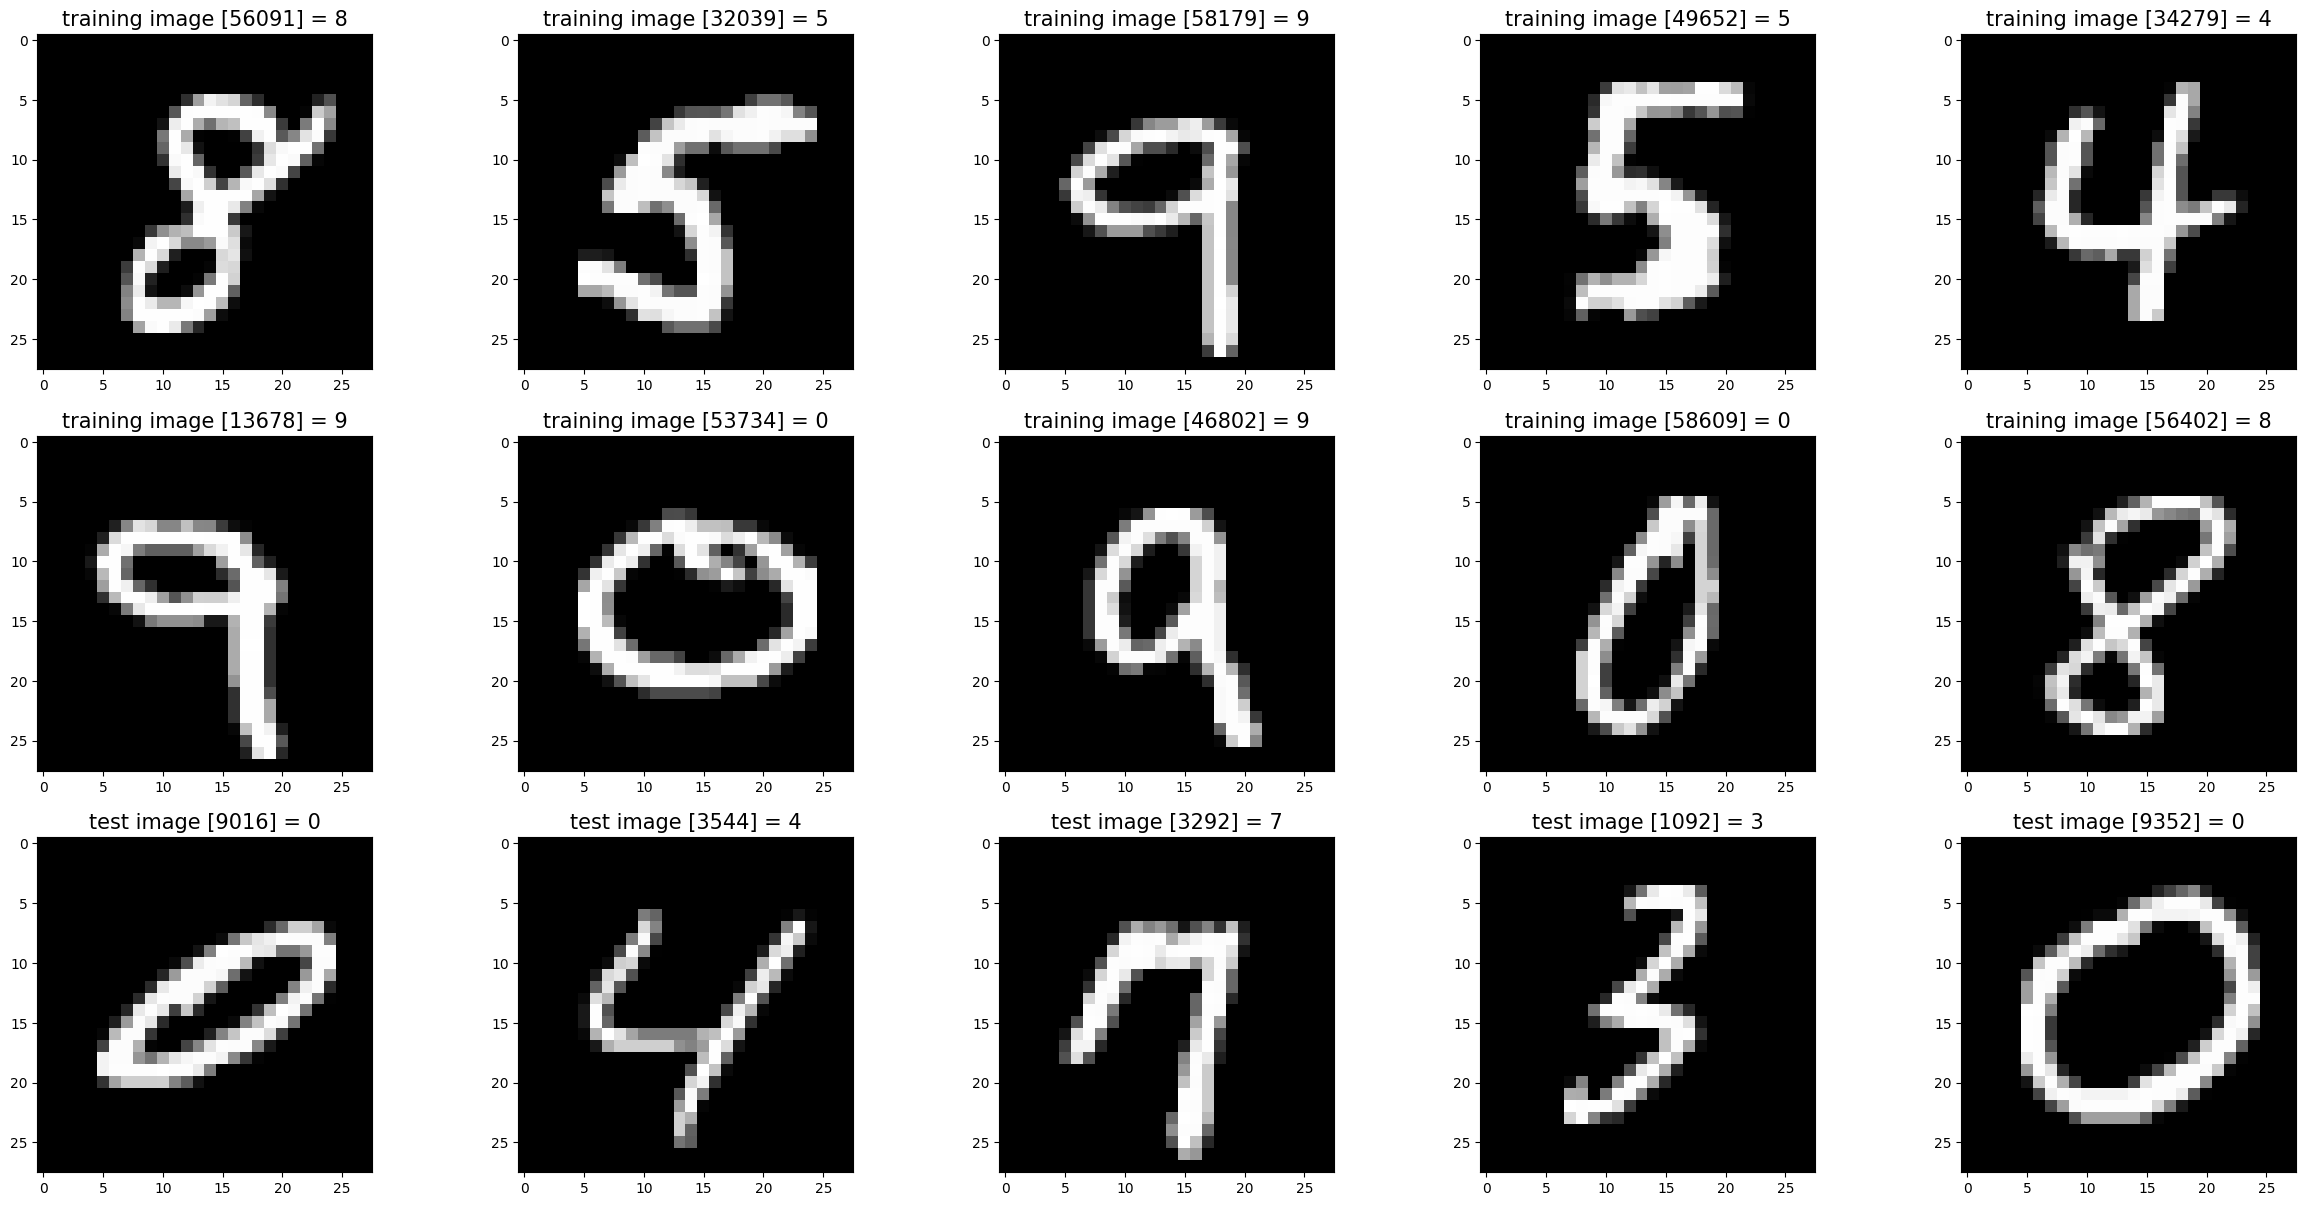

In [31]:
#
# Show some random training and test images
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))

show_images(images_2_show, titles_2_show)

## Preprocessing Data

In [45]:
def flatten_image(image):
  return image.reshape(-1,1)

def recreate_image(data, a):
  return data.reshape(a, a)

def flatten_dataset(dataset): # x_train[i] = i'th train data contains an image
  data = []
  for i in range(len(dataset)):
    data.append(dataset[i].reshape(-1,))
  return np.transpose(np.array(data)) # returns array with dim (feature_size, example_numer)

def one_hot(dataset, C): # y_train is a rank 1 array
  data = []
  for i in range(len(dataset)):
    e = [0]*C
    e[int(dataset[i])] = 1
    data.append(e)
  return np.transpose(np.array(data))

In [48]:
#Testing dataset preprocessing tools
x = np.array([[1,2],[3,4]])
z = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
print(flatten_dataset(z))
print("____________")
print(x)
y = flatten_image(x)
print("+++++++++++")
print(y)
print("===========")
print(recreate_image(y,2))
print("***********")
print(one_hot([1,2,0,1,3, 2, 1, 2], 4))

[[1 5]
 [2 6]
 [3 7]
 [4 8]]
____________
[[1 2]
 [3 4]]
+++++++++++
[[1]
 [2]
 [3]
 [4]]
[[1 2]
 [3 4]]
***********
[[0 0 1 0 0 0 0 0]
 [1 0 0 1 0 0 1 0]
 [0 1 0 0 0 1 0 1]
 [0 0 0 0 1 0 0 0]]


In [49]:
X_train = flatten_dataset(x_train)
X_test = flatten_dataset(x_test)
Y_train = one_hot(y_train,10)
Y_test = one_hot(y_test, 10)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(784, 60000) (784, 10000) (10, 60000) (10, 10000)


##Builidng Model

In [51]:
class SDX_MBatch_GD:
  def __init__(self, X, Y, layer_dims, activation_functions, learning_rate = 0.001, batch_size = 128):
    self.X = X
    self.Y = Y
    self.layer_dims = layer_dims
    self.L = len(self.layer_dims)
    self.activation_functions = activation_functions
    self.learning_rate = learning_rate
    self.batch_size = batch_size
    self.parameters = self.initialize_parameters()
    self.grads = self.initialize_grads()

  def initialize_parameters(self):
    parameters = {}
    for l in range(1,self.L):
      parameters["W" + str(l)] = np.random.randn(self.layer_dims[l],self.layer_dims[l-1])/self.layer_dims[l-1]
      #nothing special for now
      parameters["b" + str(l)] = np.zeros((self.layer_dims[l], 1))
    return parameters

  def initialize_grads(self):
    grads = {}
    for l in range(1, self.L):
      grads["dW" + str(l)] = np.zeros((self.layer_dims[l], self.layer_dims[l-1]))
      grads["db" + str(l)] = np.zeros((self.layer_dims[l], 1))
    return grads

  def initialize_cache(self):
    caches = {}
    for l in range(1, self.L):
      caches["A" + str(l)] = np.zeros((self.layer_dims[l], 1))
      caches["Z" + str(l)] = np.zeros((self.layer_dims[l], 1))


##Testing Hyperparameters

In [50]:
batch_size = 512
learning_rate = 0.001
feature_size = 28*28
layer_dims = [feature_size, 10, 10, 10]
L = len(layer_dims)
activation_functions = []
for i in range(L):
  if i==L-1:
    activation_functions.append("softmax")
  else:
    activation_functions.append("relu")